In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from simpletransformers.classification import ClassificationModel
#%matplotlib inline 

In [4]:
from collections import Counter
import time

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

### Dataset

In [10]:
df = pd.read_csv("../Dataset/df_label.csv", encoding="ISO-8859-1") # heading = none

## Learning Algorithm: BERT

In [47]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

#### Parameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [ ]:
## use colab !!!
{
  "per_gpu_batch_size": (16, 64),
  "weight_decay": (0, 0.3),
  "learning_rate": (1e-5, 5e-5),
  "warmup_steps": (0, 500),
  "num_epochs": (2, 5)
}

In [67]:
##Create a svm Classifier
## clf = model
#
## Grid Search
#param_grid = [
#  {
#  'per_gpu_batch_size': range(16, 64),
#  'weight_decay': [0.0, 0.1, 0.2, 0.3],
#  #'learning_rate': range(1e-5, 5e-5),
#  'warmup_steps': range(0, 500),
#  'num_epochs': range(2, 5)
#  }
#]
#
#grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, return_train_score=True)
#grid_search.fit(X_train)
#grid_search.best_estimator_

### BERT

In [69]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

#BERT ALGO needs in X_train even the target variable
X_train["label"] = y_train
X_test["label"] = y_test

In [ ]:
## Salvo's configuration of parameters
#model_args = ClassificationArgs(num_train_epochs=3, eval_batch_size = 32, train_batch_size= 128, learning_rate=1e-4, overwrite_output_dir=True)
model_args = ClassificationArgs(num_train_epochs=3)

# Create a ClassificationModel
model = ClassificationModel(
    'bert',
    'bert-base-cased',
    num_labels=3,
    args=model_args,
    use_cuda=False
) 

# Train the model
model.train_model(X_train)

In [71]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(X_test)

  0%|          | 0/1452 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/182 [00:00<?, ?it/s]

In [72]:
#RESULT
result

{'mcc': 0.7485853016092409, 'eval_loss': 0.5990351799531369}

In [77]:
model_outputs

array([[-1.68547344,  3.75811076, -3.07372141],
       [-3.59317803,  4.95061302, -1.55395627],
       [-3.67169142,  5.31450558, -1.84661353],
       ...,
       [-3.45605278,  5.08957529, -1.95431066],
       [-3.29701018, -1.58390248,  4.29102421],
       [-3.22304606, -1.53005648,  4.23711824]])

In [105]:
len(wrong_predictions), len(model_outputs)

(206, 1452)

In [74]:
#making a list of list for prediction
list=[]
for i in X_test['news']:
        list.append(i)

In [81]:
predictions, raw_outputs = model.predict(list)
print("Classification report", classification_report(y_test, predictions))

  0%|          | 0/1452 [00:00<?, ?it/s]

  0%|          | 0/182 [00:00<?, ?it/s]

Classification report               precision    recall  f1-score   support

           0       0.85      0.84      0.84       189
           1       0.90      0.87      0.89       855
           2       0.77      0.83      0.80       408

    accuracy                           0.86      1452
   macro avg       0.84      0.85      0.84      1452
weighted avg       0.86      0.86      0.86      1452



In [82]:
predictions

array([1, 1, 1, ..., 1, 2, 2], dtype=int64)

In [101]:
raw_outputs

array([[-1.68547344,  3.75811076, -3.07372141],
       [-3.59317803,  4.95061302, -1.55395627],
       [-3.67169142,  5.31450558, -1.84661353],
       ...,
       [-3.45605278,  5.08957529, -1.95431066],
       [-3.29701018, -1.58390248,  4.29102421],
       [-3.22304606, -1.53005648,  4.23711824]])

In [103]:
raw_outputs.shape, predictions.shape

((1452, 3), (1452,))

### Add BERT label to our df

In [83]:
len(y_test), len(predictions) ## 1452

(1452, 1452)

In [86]:
X_test

,news,label
3732,RSA s shares closed at 1569 p at the time of g...,1
3617,In addition the Kazakh delegation will visit ...,1
3968,Vaisala s expertise in lightning data and info...,1
750,Finnish electronics manufacturing services com...,2
2408,As reported June 26 both circuits continued ...,1
...,...,...
3958,Under the terms of the agreement Bunge will a...,1
2087,Cymed s net sales are expected to amount to EU...,1
4176,Aug 17 2010 Curbed delivered by Newstex An...,1
2231,The insurance division turned a EUR120m profit,1


In [87]:
df_test = X_test
df_test['bert_label'] = predictions
df_test

,news,label,bert_label
3732,RSA s shares closed at 1569 p at the time of g...,1,1
3617,In addition the Kazakh delegation will visit ...,1,1
3968,Vaisala s expertise in lightning data and info...,1,1
750,Finnish electronics manufacturing services com...,2,2
2408,As reported June 26 both circuits continued ...,1,1
...,...,...,...
3958,Under the terms of the agreement Bunge will a...,1,1
2087,Cymed s net sales are expected to amount to EU...,1,1
4176,Aug 17 2010 Curbed delivered by Newstex An...,1,1
2231,The insurance division turned a EUR120m profit,1,2


In [88]:
df_test.to_csv("../Dataset/df_test_bert.csv", index=False)

In [100]:
df_test.bert_label.value_counts(), df_test.label.value_counts()

(1    827
 2    439
 0    186
 Name: bert_label, dtype: int64,
 1    855
 2    408
 0    189
 Name: label, dtype: int64)

### Creating word clouds

In [30]:
#pip install wordcloud

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [15]:
df_bert = pd.read_csv("../Dataset/df_test_bert.csv", encoding="ISO-8859-1") # heading = none
df_bert.head()

,news,label,bert_label
0,RSA s shares closed at 1569 p at the time of g...,1,1
1,In addition the Kazakh delegation will visit ...,1,1
2,Vaisala s expertise in lightning data and info...,1,1
3,Finnish electronics manufacturing services com...,2,2
4,As reported June 26 both circuits continued ...,1,1


In [19]:
df_bert.shape

(1452, 3)

In [15]:
labels = ['Negative','Neutral','Positive']

<AxesSubplot:>

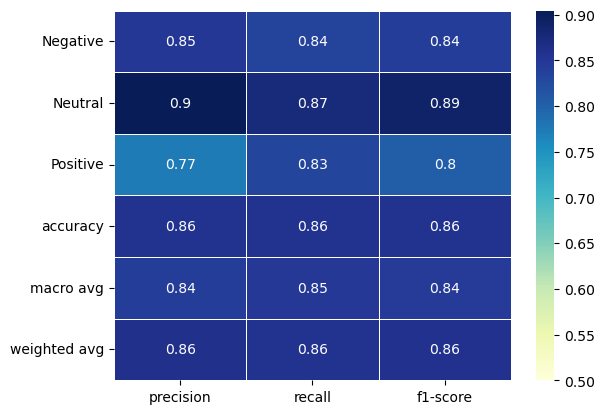

In [16]:
clf_report = classification_report(df_bert.label, df_bert.bert_label,
                                   target_names=labels,
                                   output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, linewidths=.5, vmin=0.5, cmap="YlGnBu") ## 

In [11]:
def wordcount_gen(df, category):
    combined_tweets = " ".join([tweet for tweet in df_bert[df_bert.bert_label==category]['news']])                        
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    #plt.title('{} Sentiment Words\n'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

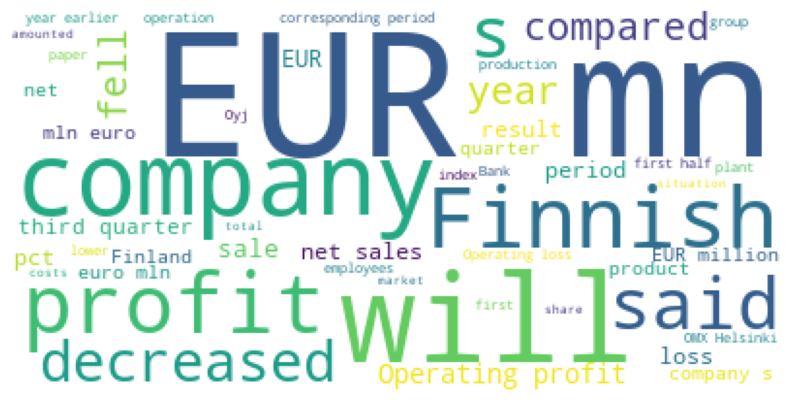

In [17]:
wordcount_gen(df_bert, 0)

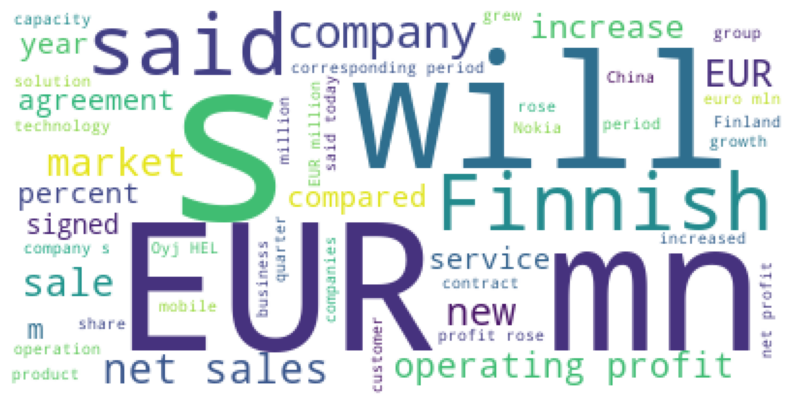

In [13]:
wordcount_gen(df_bert, 2)

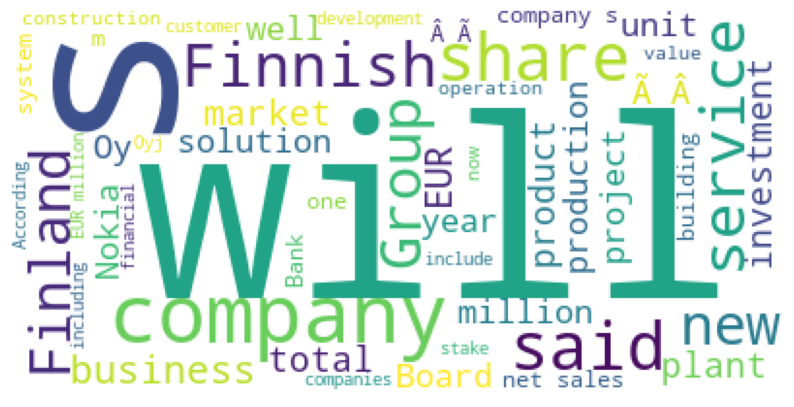

In [14]:
wordcount_gen(df_bert, 1)